In [1]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)
from razdel import tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

In [3]:
def create_dataframe(matrix, tokens_row, tokens_col):

    #doc_names = [f'doc_{i}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=tokens_row, columns=tokens_col)
    return(df)

In [4]:
def Doc_func(text, segmenter=segmenter, morph_tagger=morph_tagger):
    try:
        doc_temp = Doc(text)
        doc_temp.segment(segmenter)
        doc_temp.tag_morph(morph_tagger)
        for token in doc_temp.tokens:
            token.lemmatize(morph_vocab)
        return ' '.join([
        #_.pos + "," +
        #_.text:
        _.lemma for _ in doc_temp.tokens if _.pos not in  ['PUNCT', 'ADP', 'CCONJ', 'PRON', 'SYM', 'SCONJ', 'DET', 'NUM']])
    except:
        pass

In [5]:
def Doc_func_tokens(text, segmenter=segmenter, morph_tagger=morph_tagger):
    try:
        doc_temp = Doc(text)
        doc_temp.segment(segmenter)
        doc_temp.tag_morph(morph_tagger)
        for token in doc_temp.tokens:
            token.lemmatize(morph_vocab)
        return doc_temp.tokens
    except:
        pass

In [6]:
df = pd.read_excel("RPD_output/dataset.xlsx", usecols=['title', 'content'])
df 

,title,content
0,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...
1,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...
2,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...
3,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...
4,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...
5,Анализ данных в управлении предприятием,Основные виды учебной деятельности Формируемы...
6,Проектирование и разработка информационных систем,Основные виды учебной деятельности Формируемы...
7,Разработка Web-приложений,Основные виды учебной деятельности Формируемы...
8,Машинное обучение,Основные виды учебной деятельности Формируемы...
9,Интеллектуальные системы и технологии,(модуля) Разделы дисциплины Формируемый Виды ...


In [7]:
df['oop_name'] = 'Бизнес-анализ и разработка информационных систем'

In [8]:
df

,title,content,oop_name
0,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...,Бизнес-анализ и разработка информационных систем
1,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
2,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
3,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
4,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...,Бизнес-анализ и разработка информационных систем
5,Анализ данных в управлении предприятием,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
6,Проектирование и разработка информационных систем,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
7,Разработка Web-приложений,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
8,Машинное обучение,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
9,Интеллектуальные системы и технологии,(модуля) Разделы дисциплины Формируемый Виды ...,Бизнес-анализ и разработка информационных систем


In [9]:
df_tsu = pd.read_excel("OOP_TSU/BA_OOP.xlsx", sheet_name = 'Дисциплина-Темы2', usecols=['Дисциплина', 'Содержание темы', 'Индекс'])

In [10]:
df_tsu.loc[df_tsu['Индекс'] == 'Б1.О.26', 'Дисциплина'] = "Микроэкономика 2"
df_tsu.loc[df_tsu['Индекс'] == 'Б1.О.27', 'Дисциплина'] = "Микроэкономика 2"

In [11]:
df_tsu.loc[df_tsu['Индекс'] == 'Б1.О.26']

,Индекс,Дисциплина,Содержание темы
445,Б1.О.26,Микроэкономика 2,Пространство товаров. Предпочтения потребителя...
446,Б1.О.26,Микроэкономика 2,Бюджетное множество потребителя. Задача потреб...
447,Б1.О.26,Микроэкономика 2,Влияние дохода на поведение потребителя (норма...
448,Б1.О.26,Микроэкономика 2,Описание технологии производства (производстве...
449,Б1.О.26,Микроэкономика 2,Экономические издержки. Общие издержки произво...
450,Б1.О.26,Микроэкономика 2,Прибыль и условия ее максимизации. Решение зад...
451,Б1.О.26,Микроэкономика 2,Поведение фирмы в условиях монополии. Спрос на...
452,Б1.О.26,Микроэкономика 2,Олигополия. Задача принятия решений в условиях...
453,Б1.О.26,Микроэкономика 2,Рынок монополистической конкуренции. Равновеси...
454,Б1.О.26,Микроэкономика 2,Экономика обмена. Начальный запас. Допустимые ...


In [12]:
df_tsu.loc[df_tsu['Индекс'] == 'Б1.О.27']

,Индекс,Дисциплина,Содержание темы
456,Б1.О.27,Микроэкономика 2,Базовые методы макроэкономического анализа (мо...
457,Б1.О.27,Микроэкономика 2,Схема межотраслевого баланса. Модель Леонтьева...
458,Б1.О.27,Микроэкономика 2,Кейнсианская функция потребления. Загадка Кузн...
459,Б1.О.27,Микроэкономика 2,Макроэкономические инвестиции. Неоклассическая...
460,Б1.О.27,Микроэкономика 2,Модель кейнсианского креста для двухсекторной ...
461,Б1.О.27,Микроэкономика 2,"Количественная теория денег, уравнение обмена...."
462,Б1.О.27,Микроэкономика 2,Предпосылки модели IS-LM. Совокупные расходы и...
463,Б1.О.27,Микроэкономика 2,Спрос на труд. Предложение труда. Равновесие р...
464,Б1.О.27,Микроэкономика 2,Общая характеристика модели AD-AS. Краткосрочн...
465,Б1.О.27,Микроэкономика 2,Факторы экономического роста. Модель экономиче...


In [13]:
df_tsu = df_tsu.drop(columns=['Индекс'])

In [14]:
df_tsu.rename(columns={'Дисциплина': 'title', 'Содержание темы': 'content'}, inplace=True)
df_tsu['oop_name'] = 'Бизнес-аналитика'

In [15]:
df_tsu = df_tsu[df_tsu['content'].notnull()]

In [16]:
df_tsu = df_tsu.groupby(['title', 'oop_name'], as_index = False).agg({'content': ','.join})

In [17]:
df = df.append(df_tsu, ignore_index=True)
df

C:\Users\dwrki\AppData\Local\Temp\ipykernel_3552\844456051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tsu, ignore_index=True)


,title,content,oop_name
0,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...,Бизнес-анализ и разработка информационных систем
1,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
2,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
3,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем
4,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...,Бизнес-анализ и разработка информационных систем
...,...,...,...
107,Экономика отраслевых рынков,Формирование контуров отдельной науки: названи...,Бизнес-аналитика
108,Экономическая социология,Определение экономической социологии. Сходство...,Бизнес-аналитика
109,Экономическая статистика,Тема 1. Организация статистической деятельност...,Бизнес-аналитика
110,Экономический анализ,Тема 1. Экономический анализ: наука и практика...,Бизнес-аналитика


In [18]:
df['Doc'] = df['content'].apply(Doc_func)

In [19]:
#df = df[['title', 'Doc']]

In [20]:
df

,title,content,oop_name,Doc
0,Тестирование информационных систем,Основные виды учебной деятельности Разделы ди...,Бизнес-анализ и разработка информационных систем,основной вид учебный деятельность раздел дисци...
1,Информационные технологии в цифровой среде,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем,основной вид учебный деятельность формировать ...
2,Инструментальные средства информационных систем,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем,основной вид учебный деятельность формировать ...
3,Корпоративные информационные системы и разрабо...,Основные виды учебной деятельности Формируемы...,Бизнес-анализ и разработка информационных систем,основной вид учебный деятельность формировать ...
4,Методы и средства разработки информационных си...,Основные виды учебной деятельности Формируемый...,Бизнес-анализ и разработка информационных систем,основной вид учебный деятельность формировать ...
...,...,...,...,...
107,Экономика отраслевых рынков,Формирование контуров отдельной науки: названи...,Бизнес-аналитика,формирование контур отдельный наука название к...
108,Экономическая социология,Определение экономической социологии. Сходство...,Бизнес-аналитика,определение экономический социология сходство ...
109,Экономическая статистика,Тема 1. Организация статистической деятельност...,Бизнес-аналитика,тема организация статистический деятельность р...
110,Экономический анализ,Тема 1. Экономический анализ: наука и практика...,Бизнес-аналитика,тема экономический анализ наука практика тема ...


In [21]:
df.to_excel(r'RPD_output/dataset_res.xlsx')
df.to_csv(r'RPD_output/dataset_res.csv', encoding="utf-8-sig")
#ngram_range=(1, 2)

In [22]:
tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(df['Doc'])
feature_names = tfidf_vect.get_feature_names_out()

list_output1 = []
for i in range(len(tfidf_matrix.toarray())):
    tfidf_scores = tfidf_matrix.toarray()[i]
    sorted_features = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]
    #sorted_features = [list(filter(lambda c: c[0] > 0.02, sorted(zip(tfidf_scores, feature_names), reverse=True)))]
    list_output1.append(sorted_features[:20])

In [23]:
df.insert(4, "key_words", list_output1)

In [24]:
df.to_excel(r'RPD_output/dataset_res2.xlsx')

# Косинусное расстояние

In [25]:
tfidf_vect2 = TfidfVectorizer()
tfidf_matrix2 = tfidf_vect2.fit_transform(df['Doc'])
feature_names2 = tfidf_vect2.get_feature_names_out()

list_output2 = []
for i in range(len(tfidf_matrix2.toarray())):
    tfidf_scores2 = tfidf_matrix2.toarray()[i]
    sorted_features2 = [feature for _, feature in list(filter(lambda c: c[0] > 0.1, sorted(zip(tfidf_scores2, feature_names2), reverse=True)))]
    list_output2.append(sorted_features2)

In [26]:
list_output3 = []
for elem in list_output2:
    list_output3.append(" ".join(elem))

In [27]:
tfidf_vect3 = TfidfVectorizer()
tfidf_matrix3 = tfidf_vect3.fit_transform(list_output3)
feature_names3 = tfidf_vect3.get_feature_names_out()

In [28]:
feature_names3

array(['12', '16', '1917', ..., 'ядерный', 'язык', 'ячейка'], dtype=object)

In [29]:
cosine_similarity_matrix  = cosine_similarity(tfidf_matrix3)
create_dataframe(tfidf_matrix3.toarray(), df['title'].tolist(), feature_names3)

,12,16,1917,20,agile,analysis,and,anylogistix,assessment,bpm,...,эстетический,этап,этика,это,эффект,эффективность,юридический,ядерный,язык,ячейка
Тестирование информационных систем,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Информационные технологии в цифровой среде,0.0,0.23345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Инструментальные средства информационных систем,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Корпоративные информационные системы и разработка бизнес-приложений,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Методы и средства разработки информационных систем,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Экономика отраслевых рынков,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Экономическая социология,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Экономическая статистика,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Экономический анализ,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
dataframe_hm = create_dataframe(cosine_similarity_matrix, df['title'].tolist(), df['title'].tolist())

In [31]:
dataframe_hm_heat = dataframe_hm.iloc[0:47,47:133]

<AxesSubplot:>

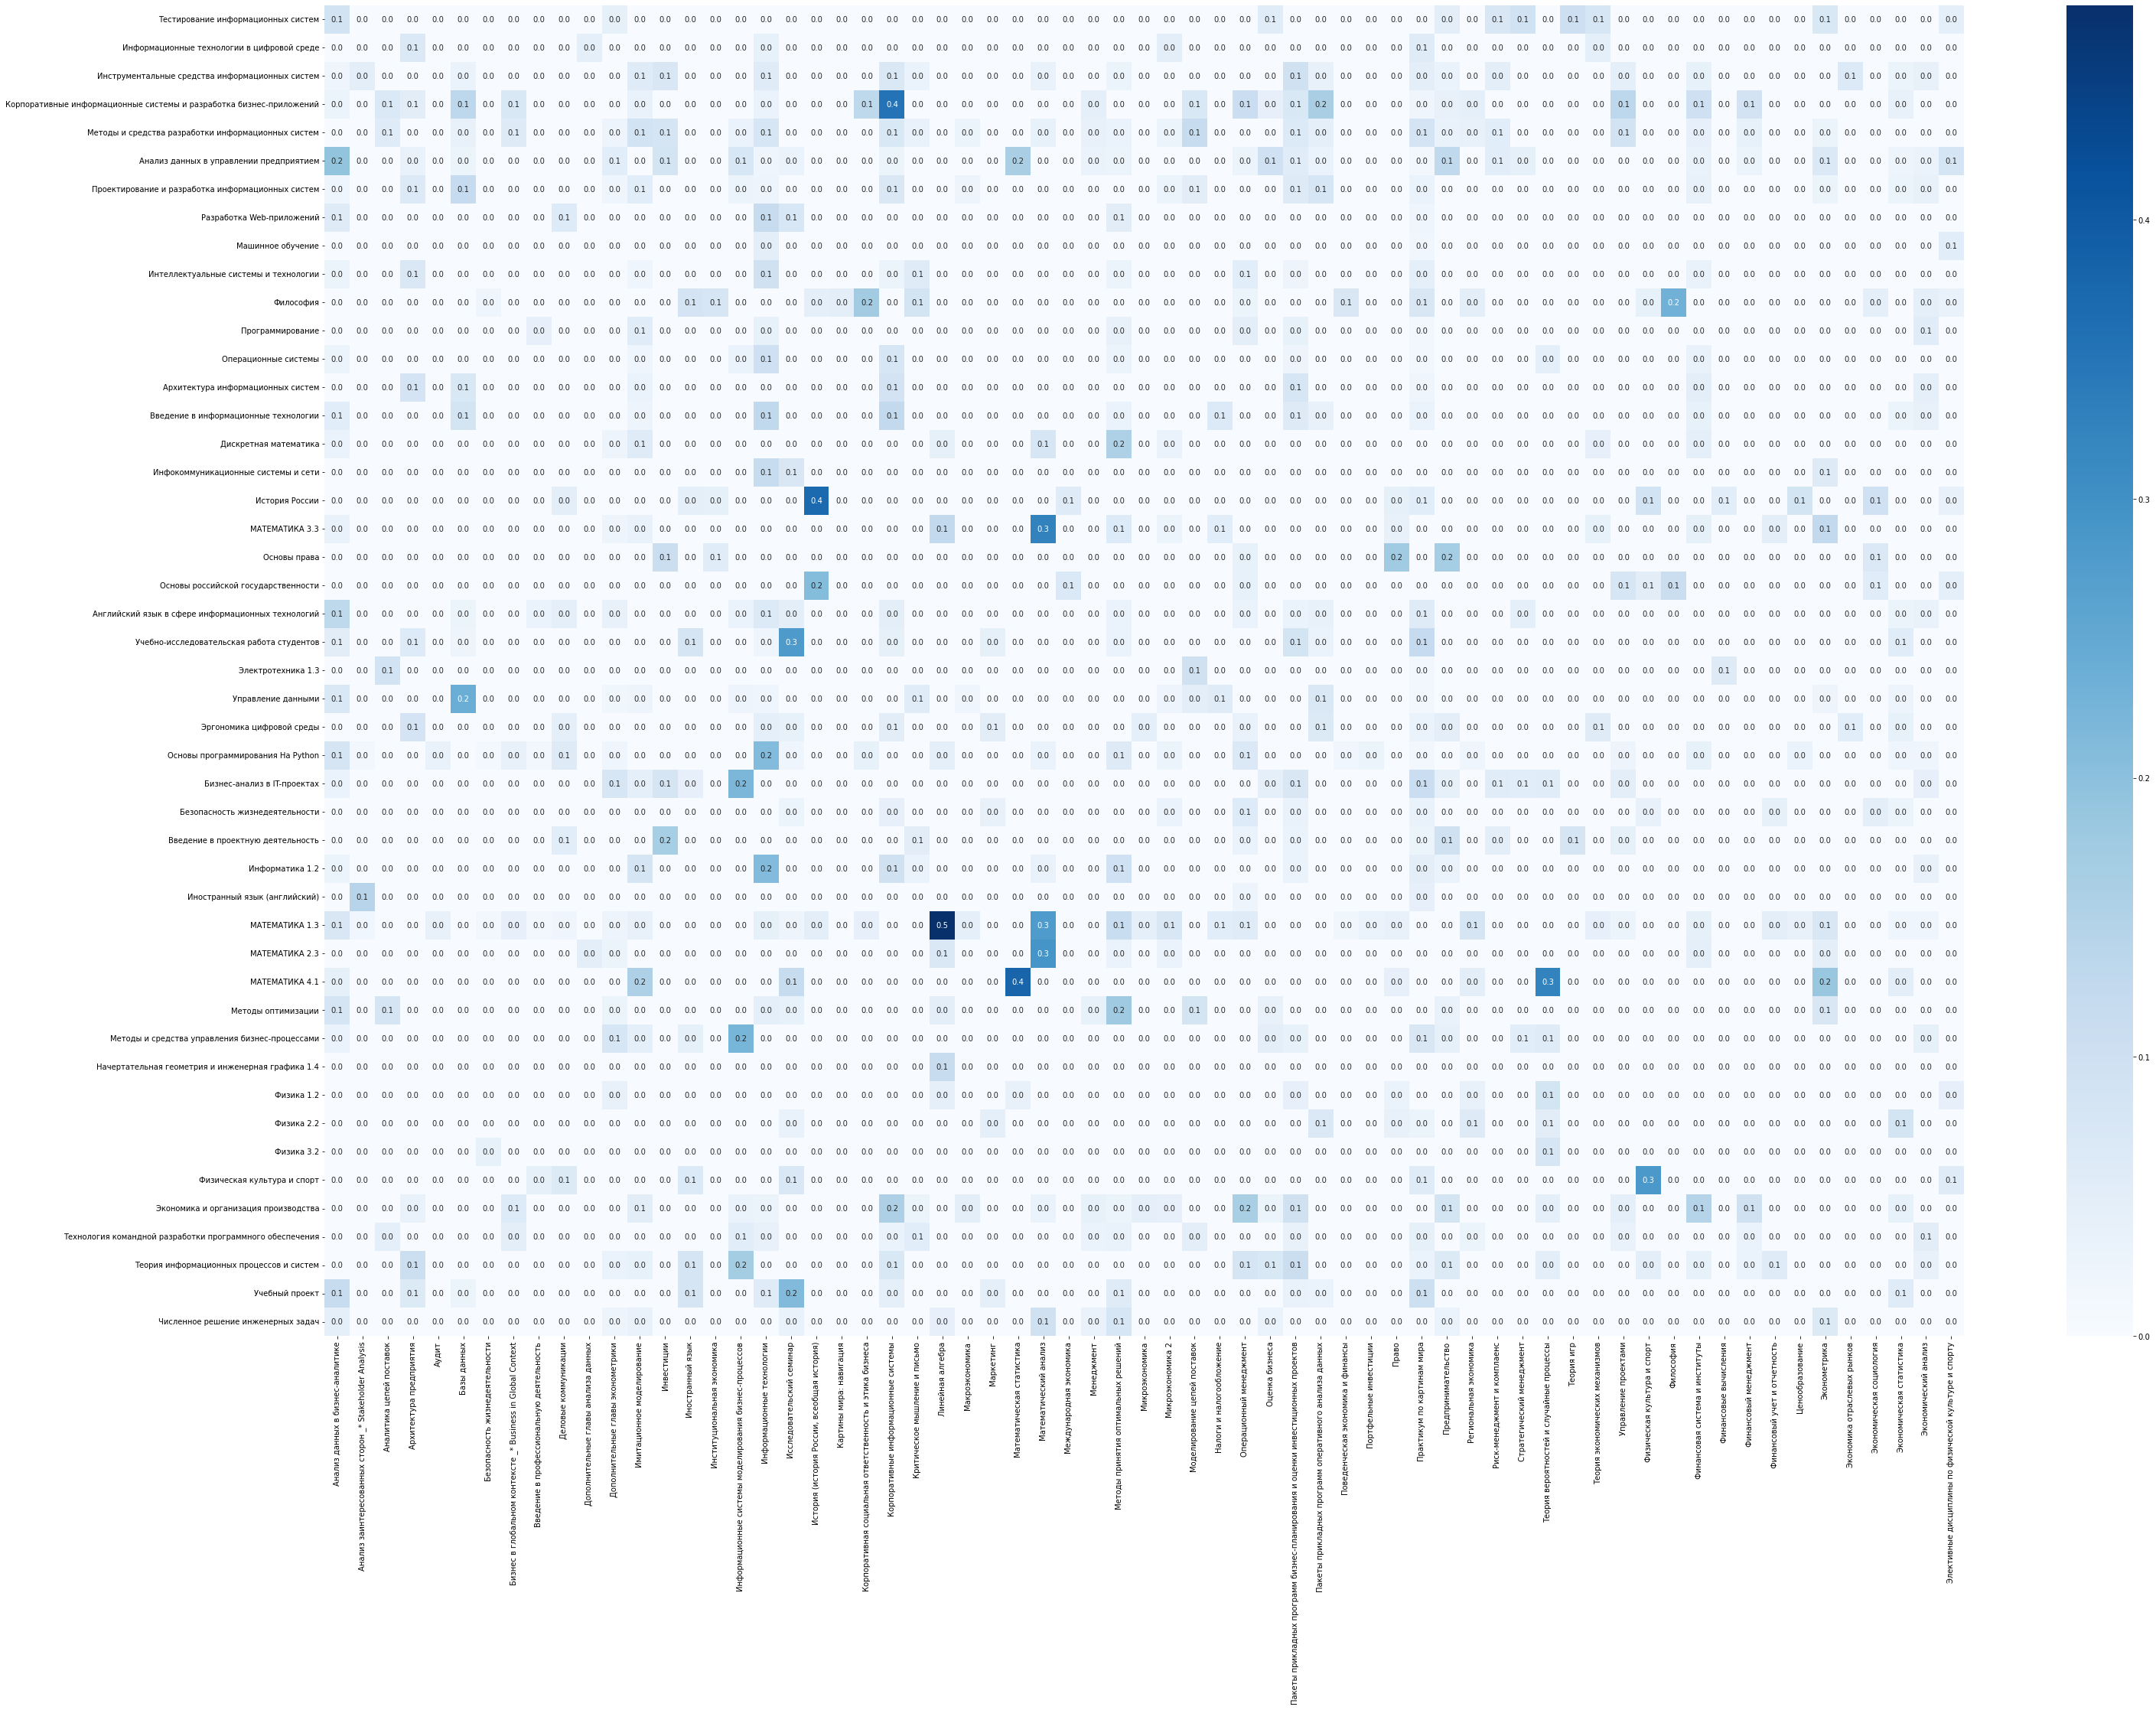

In [32]:
plt.figure(figsize = (48,32))
sns.heatmap(dataframe_hm_heat, cmap="Blues", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"

Датасет из Роснавыка (из столбца "Ключевые навыки")

In [33]:
df_rn_raw = pd.read_excel("rosnavik/dataset.xlsx")

In [34]:
df_rn = df_rn_raw[df_rn_raw['Ключевые навыки'].notnull()]
df_rn = df_rn[['Специализация', 'Ключевые навыки']]
df_rn

,Специализация,Ключевые навыки
6,"Программист, разработчик",HTML/CSS;HTML/CSS;HTML/CSS;Javascript;Javascri...
12,"Программист, разработчик",Знание базовых принципов разработки
14,"Программист, разработчик",1С: Бухгалтерия;1С: Предприятие;1С: Предприяти...
22,"Программист, разработчик",Javascript
23,"Программист, разработчик",Знание английского языка;Ответственность и про...
...,...,...
55743,Финансовый менеджер,Microsoft Excel;Ведение отчетности;Проведение ...
55746,Финансовый менеджер,Аналитическое мышление;Бюджетирование;Бюджетир...
55749,Финансовый менеджер,Работа с поставщиками;Финансовый анализ;Налого...
55750,Финансовый менеджер,Клиент-Банк;Ведение бухгалтерского учета;Веден...


In [35]:
df_rn['Ключевые навыки'].str.replace(';',' ') 

6        HTML/CSS HTML/CSS HTML/CSS Javascript Javascri...
12                     Знание базовых принципов разработки
14       1С: Бухгалтерия 1С: Предприятие 1С: Предприяти...
22                                              Javascript
23       Знание английского языка Ответственность и про...
                               ...                        
55743    Microsoft Excel Ведение отчетности Проведение ...
55746    Аналитическое мышление Бюджетирование Бюджетир...
55749    Работа с поставщиками Финансовый анализ Налого...
55750    Клиент-Банк Ведение бухгалтерского учета Веден...
55751    Microsoft PowerPoint Анализ данных Анализ фина...
Name: Ключевые навыки, Length: 33181, dtype: object

In [36]:
df_rn['Ключевые навыки+'] = df_rn['Ключевые навыки'].apply(Doc_func)

In [37]:
df_rn

,Специализация,Ключевые навыки,Ключевые навыки+
6,"Программист, разработчик",HTML/CSS;HTML/CSS;HTML/CSS;Javascript;Javascri...,html css html css html css javascript javascri...
12,"Программист, разработчик",Знание базовых принципов разработки,знание базовый принцип разработка
14,"Программист, разработчик",1С: Бухгалтерия;1С: Предприятие;1С: Предприяти...,с бухгалтерия с предприятие с предприятие упра...
22,"Программист, разработчик",Javascript,javascript
23,"Программист, разработчик",Знание английского языка;Ответственность и про...,знание английский язык ответственность проакти...
...,...,...,...
55743,Финансовый менеджер,Microsoft Excel;Ведение отчетности;Проведение ...,microsoft excel ведение отчетность проведение ...
55746,Финансовый менеджер,Аналитическое мышление;Бюджетирование;Бюджетир...,аналитический мышление бюджетирование бюджетир...
55749,Финансовый менеджер,Работа с поставщиками;Финансовый анализ;Налого...,работа поставщик финансовый анализ налоговый у...
55750,Финансовый менеджер,Клиент-Банк;Ведение бухгалтерского учета;Веден...,клиент-банк ведение бухгалтерский учет ведение...


In [38]:
df_rn = df_rn[['Специализация', 'Ключевые навыки+']]

In [39]:
df_rn = df_rn.groupby('Специализация', as_index = False).agg({'Ключевые навыки+': ','.join})
df_rn

,Специализация,Ключевые навыки+
0,"BI-аналитик, аналитик данных; Маркетолог-анали...",применение метод itsm microsoft sql server зна...
1,Аналитик,microsoft excel python sql sql целеустремленно...
2,Бизнес-аналитик,bpmn работа crm-система directum rx применение...
3,Бизнес-тренер,обучаемость адаптивность коучинг проведение тр...
4,Менеджер продукта,продажа публичный выступление проведение презе...
5,"Оператор ПК, оператор базы данных",ответственность проактивность самоорганизованн...
6,"Программист, разработчик",html css html css html css javascript javascri...
7,Системный аналитик,bpmn javascript api sql uml управление база да...
8,Финансовый менеджер,разработка программный обеспечение microsoft o...


In [40]:
tfidf_vect_rn = TfidfVectorizer()
tfidf_matrix_rn = tfidf_vect_rn.fit_transform(df_rn['Ключевые навыки+'])
feature_names_rn = tfidf_vect_rn.get_feature_names_out()

list_output_rn = []
for i in range(len(tfidf_matrix_rn.toarray())):
    tfidf_scores_rn = tfidf_matrix_rn.toarray()[i]
    sorted_features_rn = [feature for _, feature in list(filter(lambda c: c[0] > 0.001, sorted(zip(tfidf_scores_rn, feature_names_rn), reverse=True)))]
    list_output_rn.append(sorted_features_rn[:20])

In [41]:
df_rn.insert(2, "key_words", list_output_rn)

In [42]:
df_rn.to_excel(r'RPD_output\dataset_res3.xlsx')

In [43]:
list_output_rn_1 = []
for elem in list_output_rn:
    list_output_rn_1.append(" ".join(elem))
#list_output_rn_1, len(list_output_rn_1)

In [44]:
list_one = list_output_rn_1 #Датасет с ключевыми словами из вакансий РосНавыка
list_two = list_output3 #Датасет с ключевыми словами из ООП

In [45]:
list_two.extend(list_one)

In [46]:
df_col_names = df['title'].append(df_rn['Специализация'], ignore_index=True)

C:\Users\dwrki\AppData\Local\Temp\ipykernel_3552\1714843113.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_col_names = df['title'].append(df_rn['Специализация'], ignore_index=True)


In [47]:
df_col_names.tolist()

['Тестирование информационных систем',
 'Информационные технологии в цифровой среде',
 'Инструментальные средства информационных систем',
 'Корпоративные информационные системы и разработка бизнес-приложений',
 'Методы и средства разработки информационных систем',
 'Анализ данных в управлении предприятием',
 'Проектирование и разработка информационных систем',
 'Разработка Web-приложений',
 'Машинное обучение',
 'Интеллектуальные системы и технологии',
 'Философия',
 'Программирование',
 'Операционные системы',
 'Архитектура информационных систем',
 'Введение в информационные технологии',
 'Дискретная математика',
 'Инфокоммуникационные системы и сети',
 'История России',
 'МАТЕМАТИКА 3.3',
 'Основы права',
 'Основы российской государственности',
 'Английский язык в сфере информационных технологий',
 'Учебно-исследовательская работа студентов',
 'Электротехника 1.3',
 'Управление данными',
 'Эргономика цифровой среды',
 'Основы программирования Ha Python',
 'Бизнес-анализ в IT-проектах

In [48]:
tfidf_vect_final = TfidfVectorizer()
tfidf_matrix_final = tfidf_vect_final.fit_transform(list_two)
feature_names_final = tfidf_vect_final.get_feature_names_out()
cosine_similarity_matrix_final  = cosine_similarity(tfidf_matrix_final)
create_dataframe(tfidf_matrix_final.toarray(), df_col_names.tolist(), feature_names_final)


,12,16,1917,20,agile,analysis,and,anylogistix,api,assessment,...,эстетический,этап,этика,это,эффект,эффективность,юридический,ядерный,язык,ячейка
Тестирование информационных систем,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Информационные технологии в цифровой среде,0.0,0.233496,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Инструментальные средства информационных систем,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Корпоративные информационные системы и разработка бизнес-приложений,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Методы и средства разработки информационных систем,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Менеджер продукта,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225943,0.0
"Оператор ПК, оператор базы данных",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
"Программист, разработчик",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.228103,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Системный аналитик,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.269448,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [49]:
#doc_names_list_final = [f'doc_{i}' for i, _ in enumerate(cosine_similarity_matrix_final)]

In [50]:
dataframe_hm_final = create_dataframe(cosine_similarity_matrix_final, df_col_names.tolist(), df_col_names.tolist())

In [51]:
dataframe_hm_final_heat_tsu = dataframe_hm_final.iloc[47:112,112:122]
dataframe_hm_final_heat_tpu = dataframe_hm_final.iloc[0:47,112:122]
dataframe_hm_final_heat_vac = dataframe_hm_final.iloc[112:122,112:122]

<AxesSubplot:>

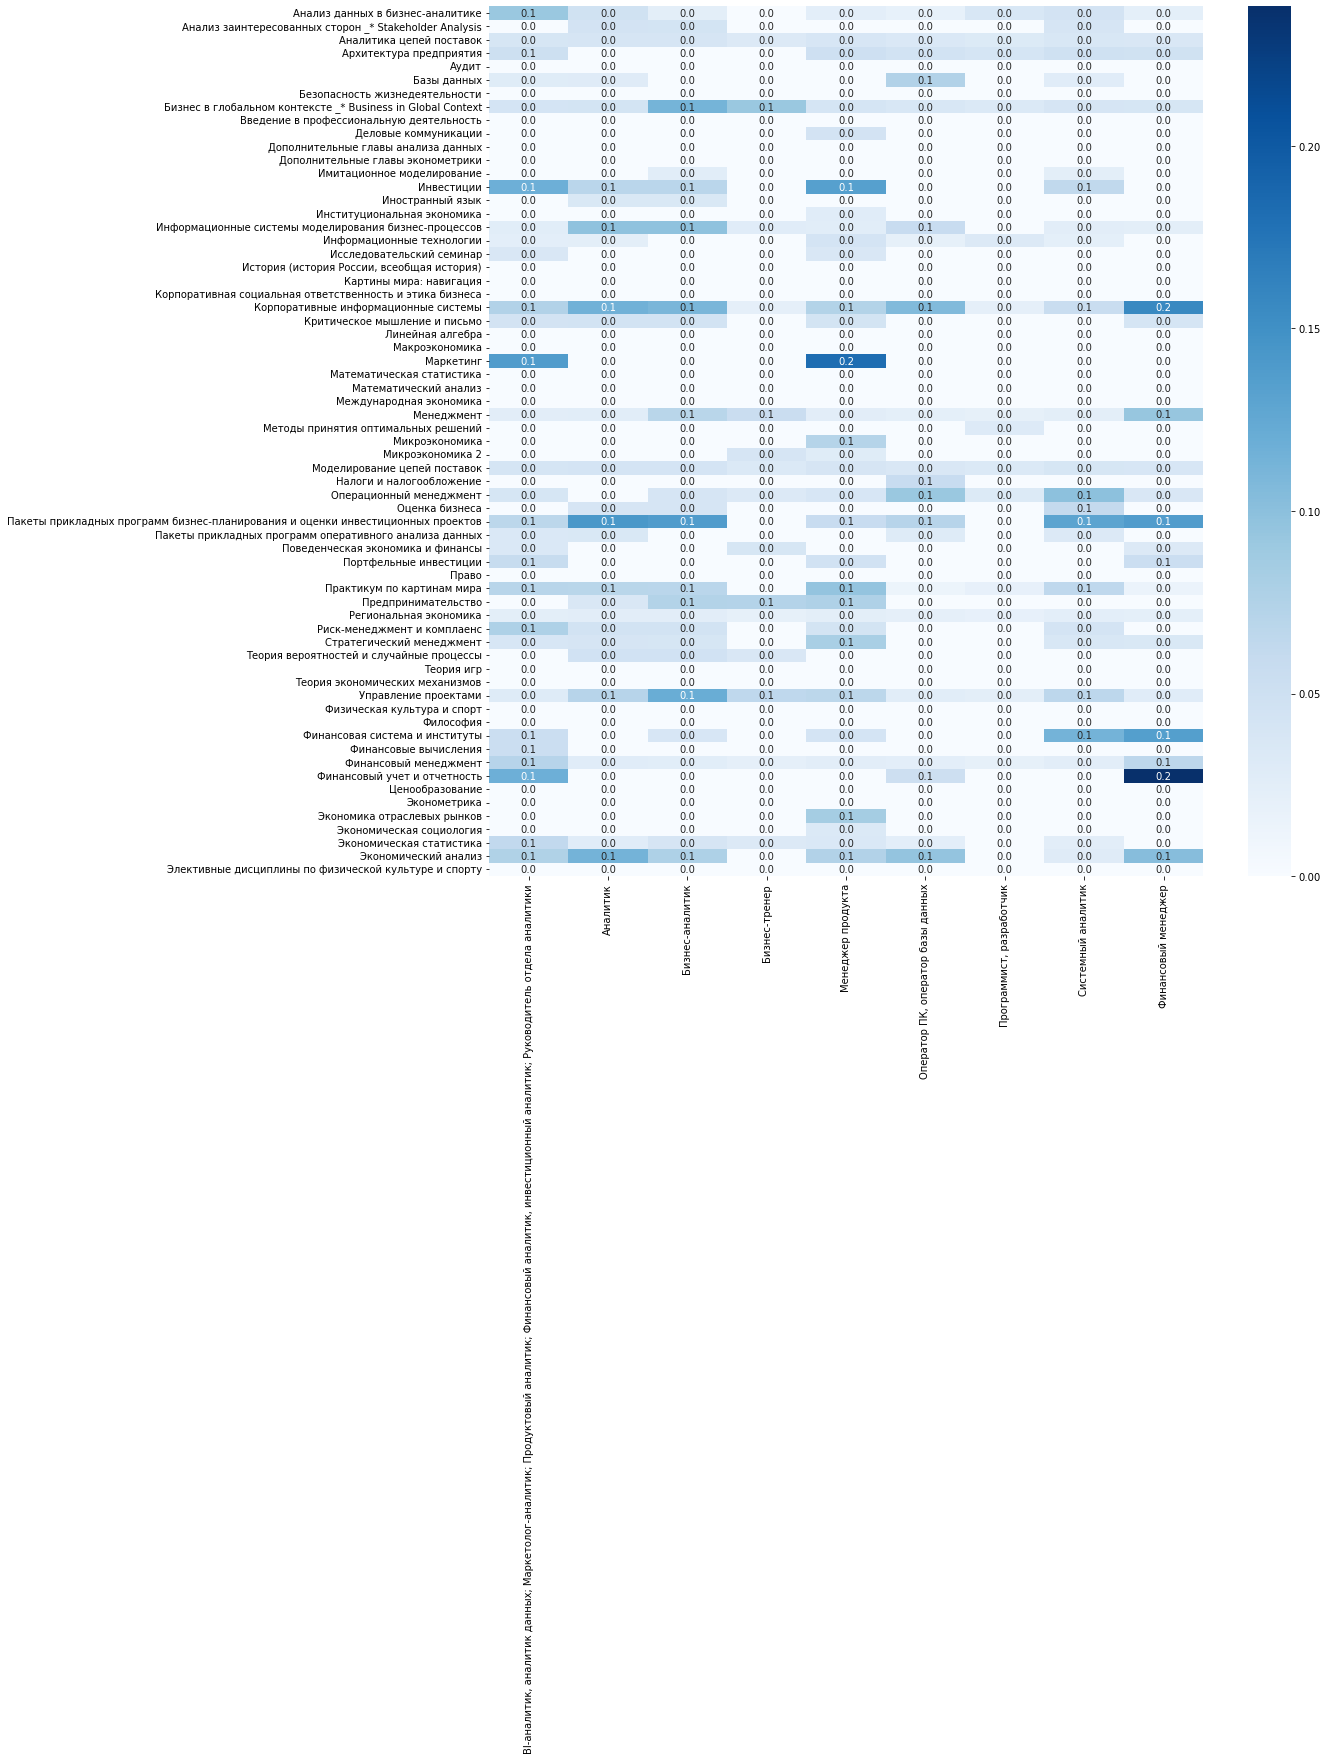

In [52]:
plt.figure(figsize = (16,16))
sns.heatmap(dataframe_hm_final_heat_tsu, cmap="Blues", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"

<AxesSubplot:>

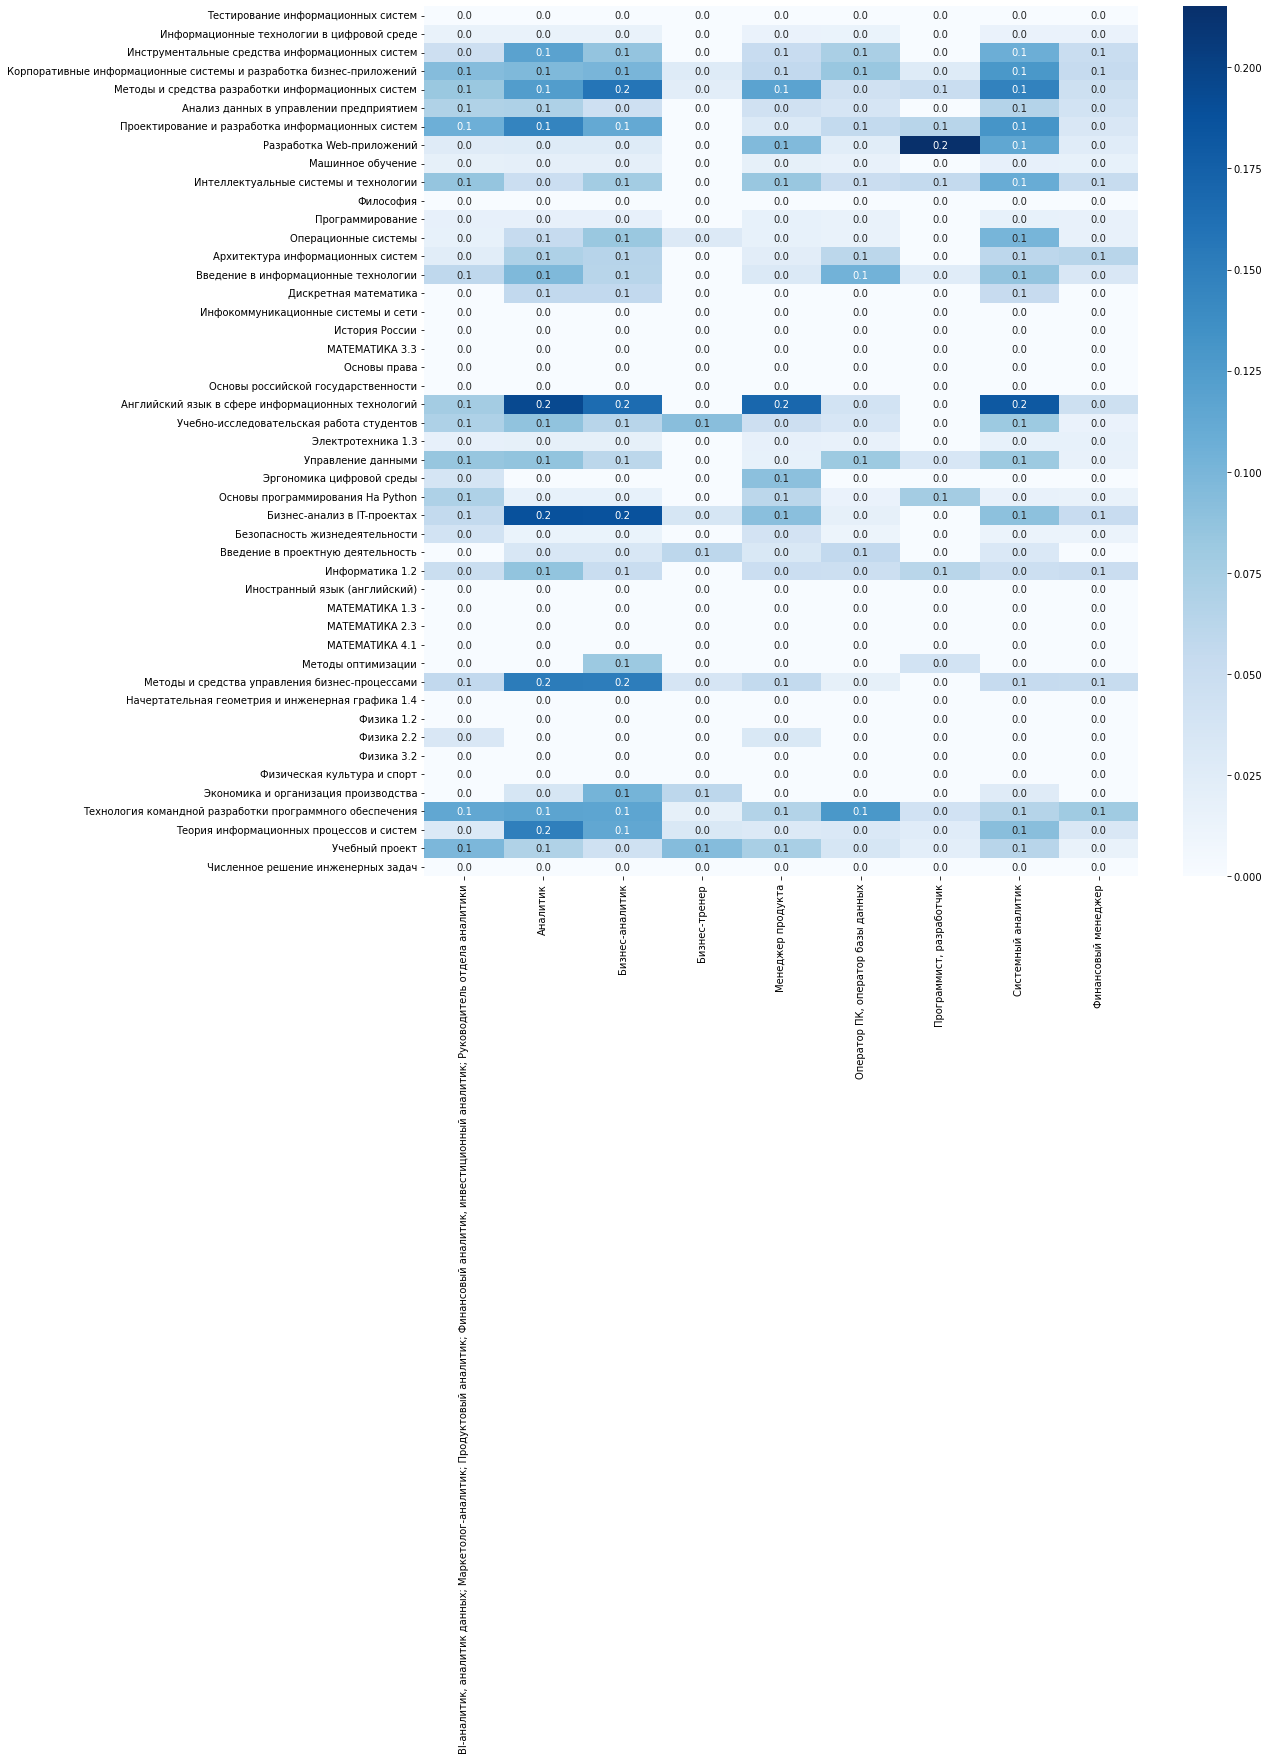

In [53]:
plt.figure(figsize = (16,16))
sns.heatmap(dataframe_hm_final_heat_tpu, cmap="Blues", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"

<AxesSubplot:>

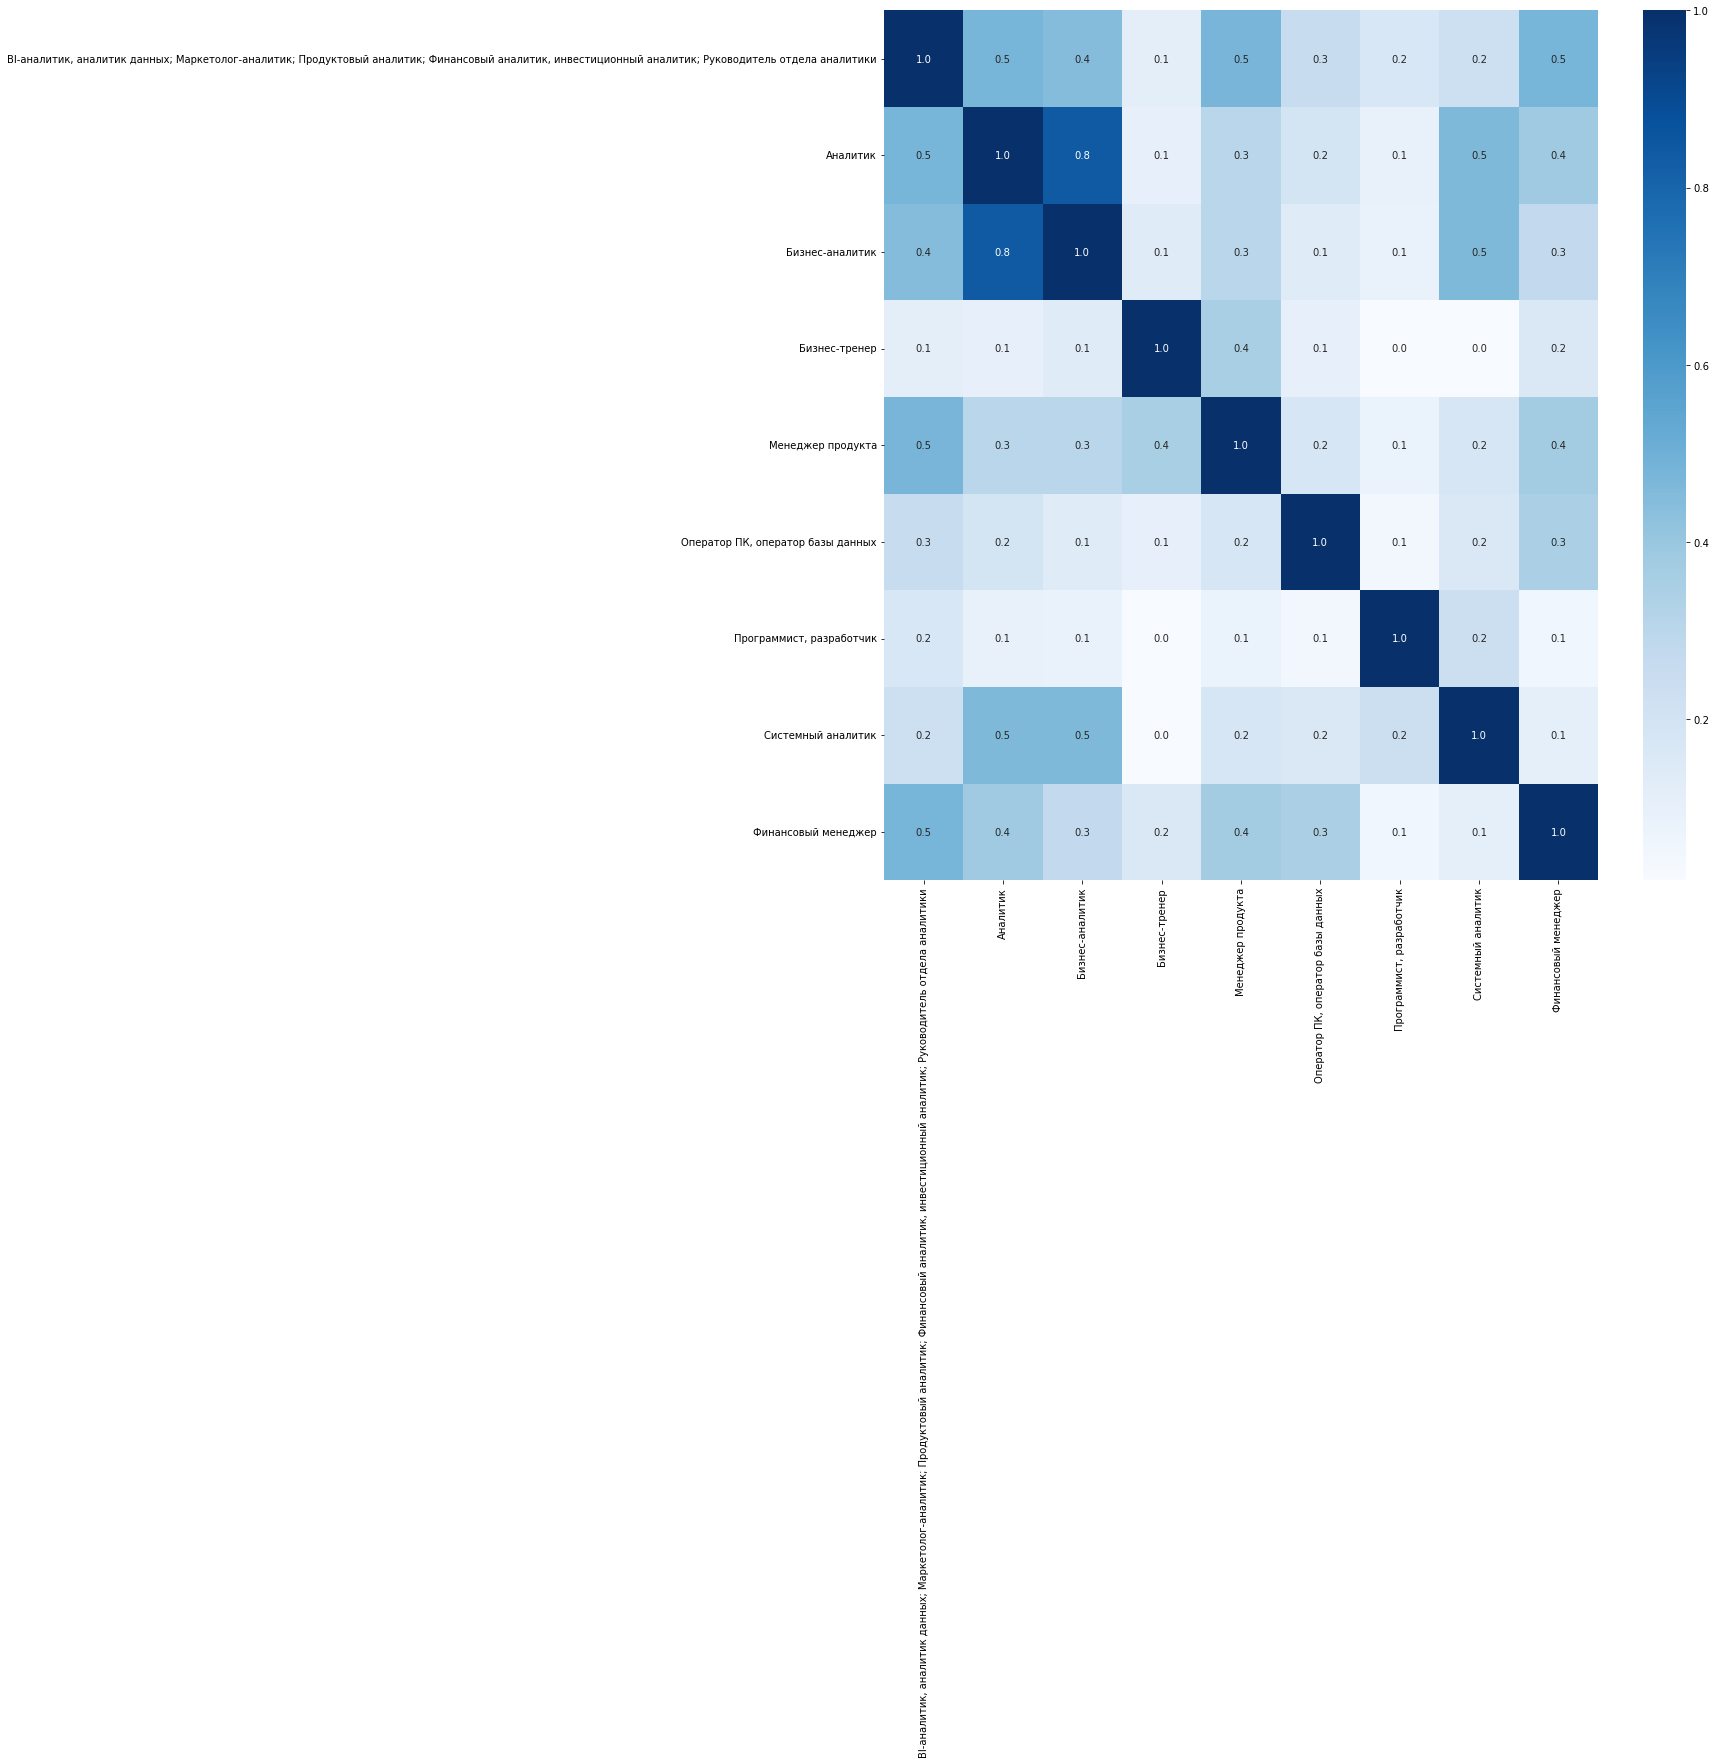

In [54]:
plt.figure(figsize = (16,16))
sns.heatmap(dataframe_hm_final_heat_vac, cmap="Blues", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"

# Обработка датасета из РосНавыка (столбец "описание вакансии")

In [ ]:
df_rn_desc = df_rn_raw[['Специализация', 'ID вакансии', 'Название вакансии', 'Описание вакансии']]

In [ ]:
df_rn_desc

In [ ]:
df_rn_desc = df_rn_desc.groupby('Специализация').sample(n=1000, random_state=1)
df_rn_desc

In [ ]:
df_rn_desc['Lemm_vac'] = df_rn_desc['Описание вакансии'].apply(Doc_func)
df_rn_desc

In [ ]:
df_rn_desc.to_excel(r'RPD_output/dataset_res_desc_vac_lemm.xlsx')

In [ ]:
df_rn_desc = df_rn_desc[['Специализация', 'ID вакансии', 'Название вакансии', 'Lemm_vac']]
df_rn_desc.info()

In [ ]:
df_rn_desc = df_rn_desc.dropna(subset=['Lemm_vac'])
df_rn_desc.info()

In [ ]:
df_rn_desc.to_csv(r'RPD_output/dataset_res_desc_vac_lemm.csv', encoding="utf-8-sig")

In [ ]:
tfidf_vect_rn_desc = TfidfVectorizer()
tfidf_matrix_rn_desc = tfidf_vect_rn_desc.fit_transform(df_rn_desc['Lemm_vac'])
feature_names_rn_desc = tfidf_vect_rn_desc.get_feature_names_out()

list_output_rn_desc = []
for i in range(len(tfidf_matrix_rn_desc.toarray())):
    tfidf_scores_rn_desc = tfidf_matrix_rn_desc.toarray()[i]
    sorted_features_rn_desc = [list(filter(lambda c: c[0] > 0.02, sorted(zip(tfidf_scores_rn_desc, feature_names_rn_desc), reverse=True)))]
    list_output_rn_desc.append(sorted_features_rn_desc)

In [ ]:
df_rn_desc_export = pd.DataFrame(list_output_rn_desc)

In [ ]:
df_rn_desc_export.to_excel(r'RPD_output/df_rn_desc_export.xlsx', encoding="utf-8")